In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from scipy.io import mmread

In [2]:
test_csv = pd.read_csv('data/Test.csv')
train_csv = pd.read_csv('data/Train.csv')

train_y = train_csv['label']
test_y = test_csv['label']

x_train_tf = mmread('data/x_train_tf.mtx')
x_test_tf = mmread('data/x_test_tf.mtx')

In [5]:
knn = KNeighborsClassifier()
leaf_size = list(range(1,30))
n_neighbors = list(range(1,30))
p=[1,2]

hyperparameters = dict(
    leaf_size=leaf_size,
    n_neighbors=n_neighbors,
    p=p
)

In [8]:
clf = RandomizedSearchCV(
    estimator=knn,
    param_distributions=hyperparameters,
    n_jobs=4,
    cv=5,
    verbose=2
)
clf = clf.fit(x_train_tf, train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ....................leaf_size=9, n_neighbors=3, p=2; total time=  48.9s
[CV] END ....................leaf_size=9, n_neighbors=3, p=2; total time=  48.9s
[CV] END ....................leaf_size=9, n_neighbors=3, p=2; total time=  49.0s
[CV] END ....................leaf_size=9, n_neighbors=3, p=2; total time=  50.2s
[CV] END ....................leaf_size=9, n_neighbors=3, p=2; total time=  23.7s
[CV] END ..................leaf_size=22, n_neighbors=17, p=2; total time=  25.4s
[CV] END ..................leaf_size=22, n_neighbors=17, p=2; total time=  25.4s
[CV] END ..................leaf_size=22, n_neighbors=17, p=2; total time=  27.4s
[CV] END ..................leaf_size=22, n_neighbors=17, p=2; total time=  26.0s
[CV] END ..................leaf_size=22, n_neighbors=17, p=2; total time=  27.1s
[CV] END ....................leaf_size=6, n_neighbors=4, p=2; total time=  27.6s
[CV] END ....................leaf_size=6, n_neig

In [9]:
best_clf = clf.best_estimator_
y_pred = best_clf.predict(x_test_tf)

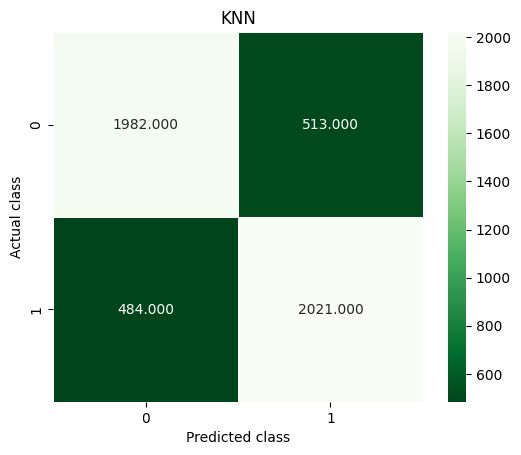

In [10]:
matrix = confusion_matrix(test_y, y_pred)
plt.figure()
sns.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Greens_r")
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.title('KNN', size=12)
plt.show()

In [11]:
metrics = classification_report(test_y, y_pred)
print(metrics)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      2495
           1       0.80      0.81      0.80      2505

    accuracy                           0.80      5000
   macro avg       0.80      0.80      0.80      5000
weighted avg       0.80      0.80      0.80      5000

